In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.transform import resize
from skimage.color import rgb2gray

In [2]:
def thresholding(f, L):
    # create a new image with ONES
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 0 the pixels below the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr

def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    img_t = thresholding(img, 0)
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        # computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        # computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]

        
    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

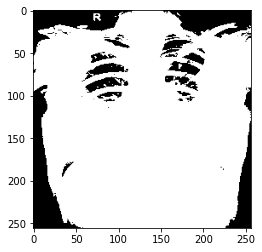

In [3]:
##img = io.imread('D:\studies\word_image_generator-master/Liver_MRI0001/phase1/img0059.dcm')
image = np.array(Image.open('D:\studies\word_image_generator-master/Chest_HoanMy_98.jpg').convert('L').resize((256,256)))

img, OL = otsu_threshold(image, 255)

plt.imshow(img, cmap='Greys_r')
plt.draw()
plt.show()

The threshold is chosen so that the object is separate from the background, the lung is also visible from the body object because in the original image, the lung is not clearly show and can be considered as a background